## Progetto Machine Learning: Autorship
Scegliamo di usare il kernel offerto da Anaconda perchè, rispetto a quello installato quando scarichiamo direttamente python, 
ha già tutte le librerie di cui abbiamo bisogno. Premi in alto a destra e seleziona il kernel di Jupyter. Se fai questa print
dovrebbe stampare: "c:\Users\Utente\anaconda3\python.exe"

In [6]:
import sys
print(sys.executable)

c:\Users\Utente\anaconda3\python.exe


In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'turbo'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])


Prendiamo i dati dal CSV. Memorizziamo il training set in un dizionario python in modo da semplificarne la manipolazione: ogni autore ha il suo corpus associato.

In [8]:
import pandas as pd

file_training   = "C:\\Users\\Utente\\Desktop\\ML\\materiale\\Gungor_2018_VictorianAuthorAttribution_data-train.csv"
file_test       = "C:\\Users\\Utente\\Desktop\\ML\\materiale\\Gungor_2018_VictorianAuthorAttribution_data.csv"


df = pd.read_csv(file_training, delimiter=',',  encoding='latin-1')
print("Dataset di training:\n{}\n".format(df.head()))


classes      = [x for x in df['author'].unique()]
authors      = len(classes)
classes_norm = [x for x in range (1,authors+1)]


# creazione di training e test set
test_dim      = 100
dft           = df.sample(test_dim)
df            = df.drop(dft.index)
global_corpus = df['text'].to_numpy()
# items         = len(global_corpus)


print("Classi presenti nel training set  : {}".format(classes))
print("Classi normalizzate               : {}".format(classes_norm))
print("Numero di classi nel training set : {}".format(authors))

Dataset di training:
                                                text  author
0  ou have time to listen i will give you the ent...       1
1  wish for solitude he was twenty years of age a...       1
2  and the skirt blew in perfect freedom about th...       1
3  of san and the rows of shops opposite impresse...       1
4  an hour s walk was as tiresome as three in a s...       1

Classi presenti nel training set  : [1, 2, 3, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50]
Classi normalizzate               : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Numero di classi nel training set : 45


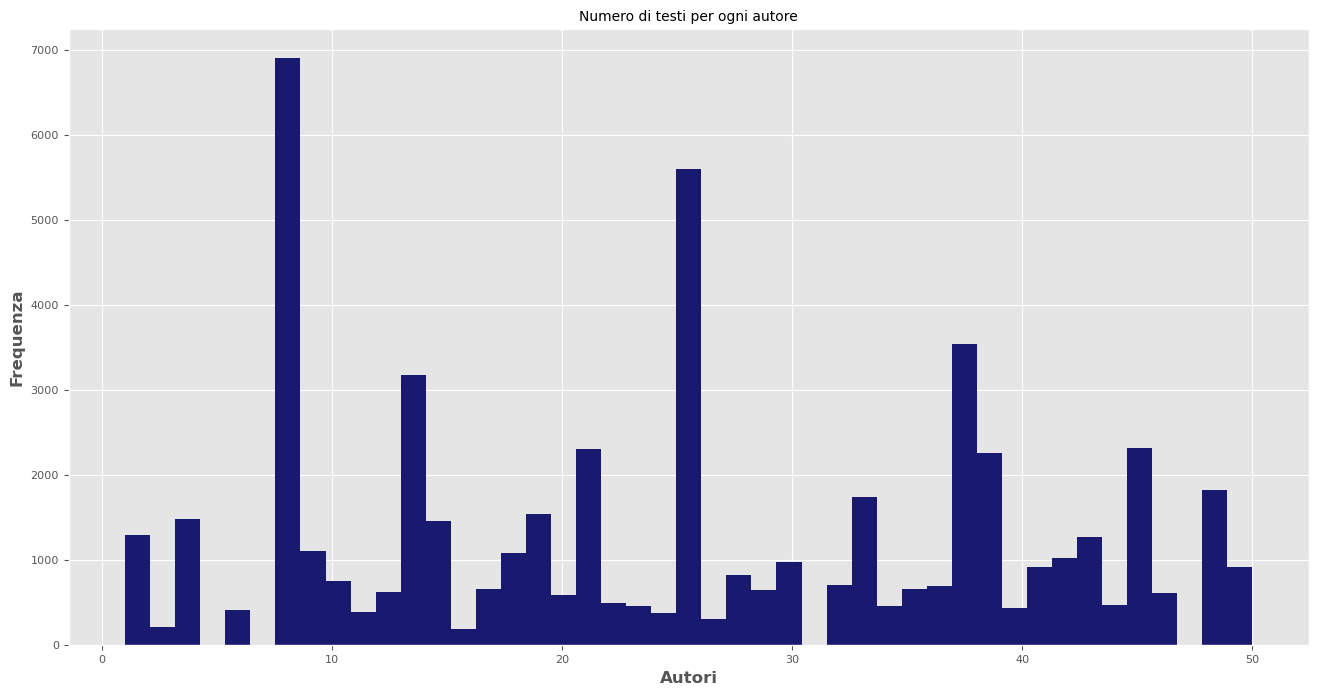

In [9]:
# Istogramma

authors_array = df['author'].to_numpy()
plt.hist(authors_array, bins=authors, color='midnightblue')
plt.xlabel('Autori', fontsize=12)
plt.ylabel('Frequenza',fontsize=12)
plt.title('Numero di testi per ogni autore')
plt.show()

# Preprocessamento dei dati
per la rappresentazione VETTORIALE dei testi. I corpus vengono lemmatizzati per raggruppare parole semanticamente equivalenti. Infine viene creato il modello di linguaggio per ogni classe (autore) che, in questo modo, viene descritta da un vettore di occorrenze di termini.

In [10]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


# Funzione per la lemmatizzazione di un testo in formato stringa

def lemmatize_text(text, lemmatizer):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)



# Creazione della distribuzione delle parole per i vari autori

lemmatizer = WordNetLemmatizer()
vectorizer = CountVectorizer(stop_words='english', lowercase=True)


lemmatized_data      = [lemmatize_text(text, lemmatizer) for text in global_corpus]
lemmatized_data_test = [lemmatize_text(text, lemmatizer) for text in dft['text'].to_numpy()]

X_train = vectorizer.fit_transform(lemmatized_data)
y_train = df.author
X_test  = vectorizer.transform(lemmatized_data_test)
y_test  = dft.author

print(X_train.shape)  

(53578, 8428)


# NAIVE BAYES

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1.0e-9)
clf.fit(X_train, y_train.ravel())

MultinomialNB(alpha=1e-09)

Grafici per Prior $p(C_i)$, Likelihood $p(t_j|C_i)$, Evidenza $p(t_j)$ e Posterior $p(C_i|t_j)$

In [12]:
# distribuzione a priori e likelihood p(t_j|C_i)
prior=np.exp(clf.class_log_prior_)
lik=np.exp(clf.feature_log_prob_)

# calcolo dell'evidenza
def sumAllClasses(t_i):
    sum = 0
    for c_k in range(0,authors):
        sum += lik[c_k,t_i]*prior[c_k]
    return sum

evid=np.array(
    [sumAllClasses(term_i) for term_i in range(lik.shape[1])]
    )
print(lik.shape)
print(evid.shape)

# da graficare, da calcolare posterior


(45, 8428)
(8428,)


Calcolo dell'accuracy sul test set, ho fatto un plot di prova, può essere tolto che non ha molto senso

Accuracy = 0.8500000


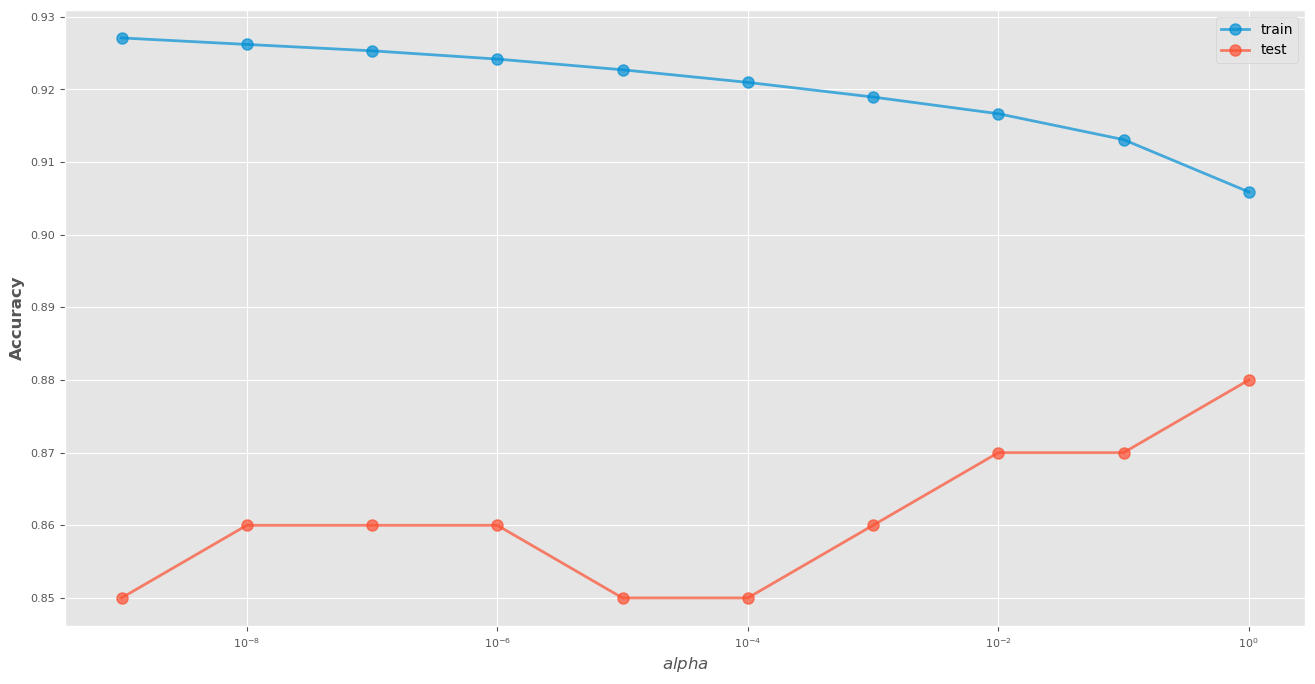

In [13]:
preds = clf.predict(X_test)
print('Accuracy = {0:8.7f}'.format(accuracy_score(y_test, preds)))

alphas = [1.0e-9, 1.0e-8, 1.0e-7, 1.0e-6, 1.0e-5, 1.0e-4, 1.0e-3, 1.0e-2, 1.0e-1, 1.0]
train_errs = []
test_errs = []
for a in alphas:
    clf = MultinomialNB(alpha=a)
    clf.fit(X_train, y_train.ravel())
    preds_train = clf.predict(X_train)
    preds_test  = clf.predict(X_test)
    train_errs.append(accuracy_score(y_train, preds_train))
    test_errs.append(accuracy_score(y_test, preds_test))

fig = plt.figure(figsize=(16,8))
ax = fig.gca()
plt.tick_params(axis='both', which='major', labelsize=8)
ax.plot(alphas, train_errs, '-o', color=colors[0], markersize=8, alpha=.7, label='train')
ax.plot(alphas, test_errs, '-o', color=colors[1], markersize=8, alpha=.7, label='test')
plt.legend(fontsize=10)
plt.xlabel('$alpha$', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xscale("log")
plt.show()

# KNN

In [2]:
from sklearn.model_selection import cross_val_score
import inspect


# Ottenere il codice della funzione my_function
codice = inspect.getsource(cross_val_score)

# Stampa il codice
print(codice)

def cross_validate(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch="2*n_jobs",
    return_train_score=False,
    return_estimator=False,
    error_score=np.nan,
):
    """Evaluate metric(s) by cross-validation and also record fit/score times.

    Read more in the :ref:`User Guide <multimetric_cross_validation>`.

    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.

    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.

    y : array-like of shape (n_samples,) or (n_samples, n_outputs), \
            default=None
        The target variable to try to predict in the case of
        supervised learning.

    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
       